# QBIO 482 HW 1

Nicole Black

1. Simulate a length 100 random walk on a 2D lattice. Use numpy and vectorize your code where possible. Visualize your random walk with a line plot

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

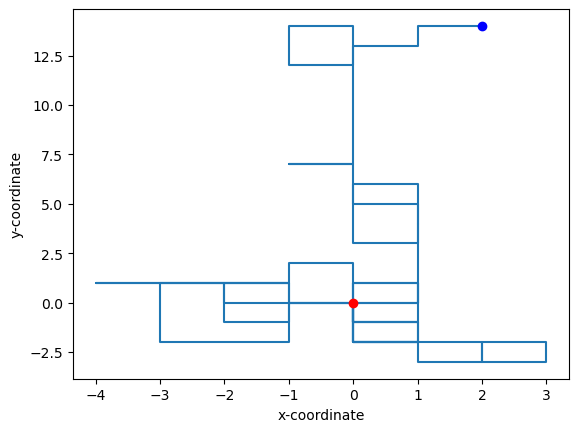

In [2]:
n_steps = 100
step_prob = 0.5

flips = np.random.random(n_steps)

flips = np.floor(4 * flips).astype(int) # [0,1,2,3] == [+x, -x, +y, -y]

position = np.zeros(shape=(n_steps+1, 2))

for i in range(0, n_steps):
    if (flips[i] == 0): # +x
        position[i+1][0] = position[i][0] + 1
        position[i+1][1] = position[i][1]
    elif (flips[i] == 1): # -x
        position[i+1][0] = position[i][0] - 1
        position[i+1][1] = position[i][1]
    elif (flips[i] == 2): # +y
        position[i+1][1] = position[i][1] + 1
        position[i+1][0] = position[i][0]
    else: # -y
        position[i+1][1] = position[i][1] - 1
        position[i+1][0] = position[i][0]

x, y = position.T
plt.plot(x,y)
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.plot(0,0, 'ro') # starting position (for reference)
plt.plot(x[n_steps], y[n_steps], 'bo') # ending position (for reference)
plt.show()

2. Make a histogram of the end-to-end distances for 1000 random walks of length 100. Describe the shape.

(0.0, 100.0)

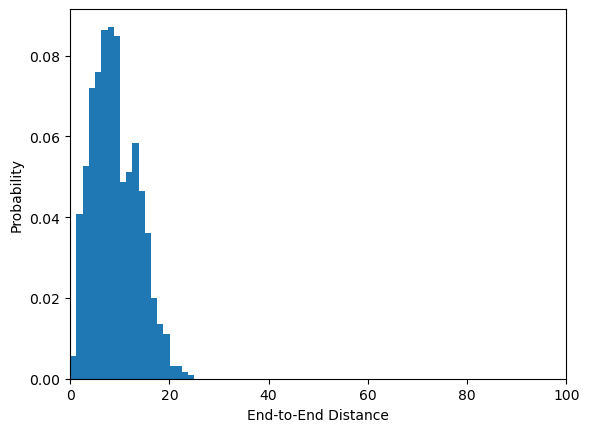

In [3]:
n_sims = 1000
n_steps = 100
step_prob = 0.5

flips = np.random.random(size=(n_sims, n_steps))

flips = np.floor(4 * flips).astype(int) # [0,1,2,3] == [+x, -x, +y, -y]

dist = np.sqrt(pow((flips==0).sum(axis=1) - (flips==1).sum(axis=1),2) + pow((flips==2).sum(axis=1) - (flips==3).sum(axis=1),2))

plt.hist(dist, bins=20, density=True)
plt.xlabel('End-to-End Distance')
plt.ylabel('Probability')

# x-axis covers entire range of possibiltiy 
plt.xlim([0, 100])

*The above histogram roughly follows a right-skewed Gaussian distribution centered around 10. This makes sense intuitively as our walker moves up/down at equal probablities and left/right at equal probabilities so it likely won't move considerable distances in a singular direction (meaning the tail of the end-to-end distance histogram remains short, and likely the walker moves only a short distance). The reason why it is skewed away from 0 is because there are fewer possible ending positions that result in a short end-to-end distance (ie an end-to-end distance of 1 can only be created with an ending position of (0,1), (0,-1), (-1,0), (1,0) versus an end-to-end distance of 5 can be created with an ending position of (0,5), (0,-5), (-5,0), (5,0), (3,4), (-3,4), etc.)*

3. Simulate many length 100, 200, 500, 1000, 2000, 5000 and 10000 random walks. Calculate the probability for each of these walks to return to the origin as a function of length, and visualize this relationship with a log-log plot.

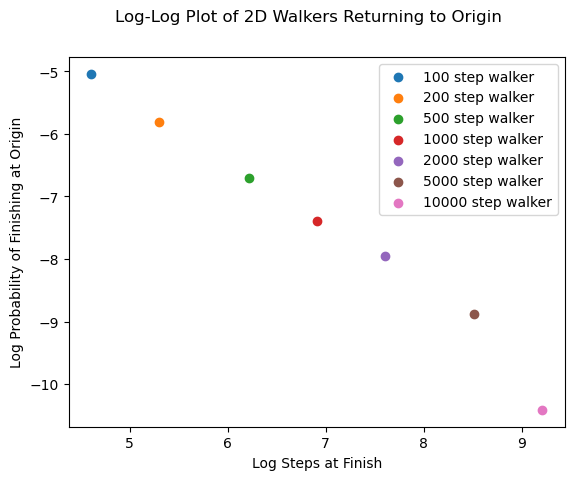

In [4]:
n_sims = 100000
n_steps = [100, 200, 500, 1000, 2000, 5000, 10000]
step_prob = 0.5

for i in n_steps:
    flips = np.random.random(size=(n_sims, i))
    flips = np.floor(4 * flips).astype(int) # [0,1,2,3] == [+x, -x, +y, -y]
    dist_origin = np.sqrt(pow((flips==0).sum(axis=1) - (flips==1).sum(axis=1),2) + pow((flips==2).sum(axis=1) - (flips==3).sum(axis=1), 2))      
    plt.scatter(np.log(i), np.log((dist_origin==0).sum()/n_sims))
    
plt.legend(["100 step walker", "200 step walker", "500 step walker", "1000 step walker", "2000 step walker", "5000 step walker", "10000 step walker"])
plt.xlabel('Log Steps at Finish')
plt.ylabel('Log Probability of Finishing at Origin')
plt.suptitle('Log-Log Plot of 2D Walkers Returning to Origin')
plt.show()

4. Repeat this for walks on a 3D lattice. Explain how 2D and 3D walks differ and how confining molecules to a 2D membrane could be used as a strategy for cells to speed up molecular communication in up to four sentences.

/var/folders/9h/v7bymggj60j394yr5bpjx4mh0000gn/T/ipykernel_30885/476742921.py:9: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(i), np.log((dist_origin==0).sum()/n_sims))


Text(0.5, 0.98, 'Log-Log Plot of 2D Walkers Returning to Origin')

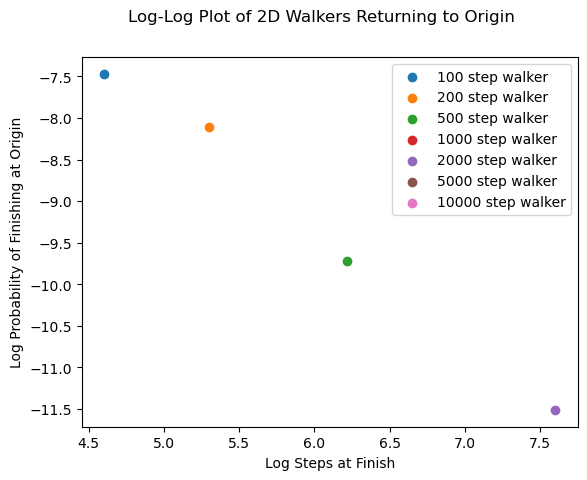

In [5]:
n_sims = 100000
n_steps = [100, 200, 500, 1000, 2000, 5000, 10000]
step_prob = 0.5

for i in n_steps:
    flips = np.random.random(size=(n_sims, i))
    flips = np.floor(6 * flips).astype(int) # [0,1,2,3,4,5] == [+x, -x, +y, -y, +z, -z]
    dist_origin = np.sqrt(pow((flips==0).sum(axis=1) - (flips==1).sum(axis=1),2) + pow((flips==2).sum(axis=1) - (flips==3).sum(axis=1), 2) + pow((flips==4).sum(axis=1) - (flips==5).sum(axis=1),2))
    plt.scatter(np.log(i), np.log((dist_origin==0).sum()/n_sims))
    
plt.legend(["100 step walker", "200 step walker", "500 step walker", "1000 step walker", "2000 step walker", "5000 step walker", "10000 step walker"])
plt.xlabel('Log Steps at Finish')
plt.ylabel('Log Probability of Finishing at Origin')
plt.suptitle('Log-Log Plot of 2D Walkers Returning to Origin')

/var/folders/9h/v7bymggj60j394yr5bpjx4mh0000gn/T/ipykernel_30885/1271732580.py:14: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(i), np.log((dist_origin==0).sum()/n_sims), c = "blue")


Text(0.5, 0.98, 'Log-Log Plot of 2D and 3D Walkers Returning to Origin')

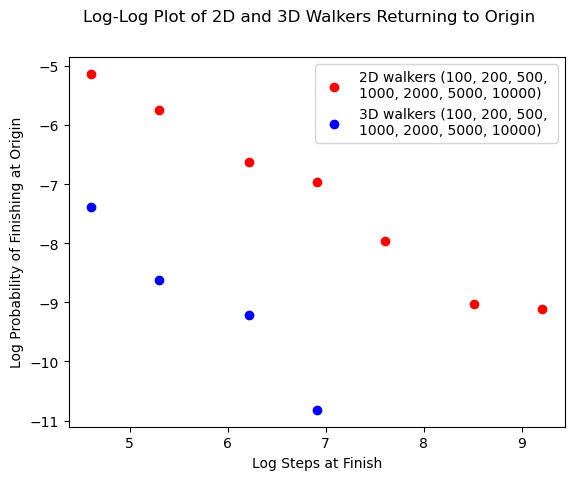

In [6]:
n_sims = 100000
n_steps = [100, 200, 500, 1000, 2000, 5000, 10000]
step_prob = 0.5

for i in n_steps:
    flips = np.random.random(size=(n_sims, i))
    flips = np.floor(4 * flips).astype(int) # [0,1,2,3] == [+x, -x, +y, -y]
    dist_origin = np.sqrt(pow((flips==0).sum(axis=1) - (flips==1).sum(axis=1),2) + pow((flips==2).sum(axis=1) - (flips==3).sum(axis=1), 2))      
    plt.scatter(np.log(i), np.log((dist_origin==0).sum()/n_sims), c = "red")
    
    flips = np.random.random(size=(n_sims, i))
    flips = np.floor(6 * flips).astype(int) # [0,1,2,3,4,5] == [+x, -x, +y, -y, +z, -z]
    dist_origin = np.sqrt(pow((flips==0).sum(axis=1) - (flips==1).sum(axis=1),2) + pow((flips==2).sum(axis=1) - (flips==3).sum(axis=1), 2) + pow((flips==4).sum(axis=1) - (flips==5).sum(axis=1),2))
    plt.scatter(np.log(i), np.log((dist_origin==0).sum()/n_sims), c = "blue")
    
plt.legend(["2D walkers (100, 200, 500, \n1000, 2000, 5000, 10000)", "3D walkers (100, 200, 500, \n1000, 2000, 5000, 10000)"])
plt.xlabel('Log Steps at Finish')
plt.ylabel('Log Probability of Finishing at Origin')
plt.suptitle('Log-Log Plot of 2D and 3D Walkers Returning to Origin')

*Because 3D walks add in an additional axis (z), the probability of either returning to the origin (ie "canceling out" all positive and negative steps along each axis) or generally just reaching a given location, is much lower than with the simpler 2D plane walks. In regards to cellular communication, in a 2D environment, we can reasonably expect a transmitter molecule to reach a given location of a receptor, especially if that receptor is near to the origin of the molecule itself. However, in a 3D environment, the probability of a molecule reaching a given location is much less likely since there are more options of steps that can be taken (this issue becomes even more glaring when we consider a 3D non-lattice surface, which allows molecules to move in even more directions).*

Estimating diffusion coefficients. Here we will use the observed trajectories of diffusing GFP molecules to estimate the diffusion coefficient

5. Conventional microscopy to observe individual fluorescent proteins won’t work. In this part of the problem, we are going to work out why. During a traditional experiment, the microscope shutter is open during some time interval of order 10s to 100s of milliseconds. By assuming a diffusion constant of 10 µm^2/s, work out how far the fluorescent protein will move during the time that the shutter is open and compare that distance to the size of the cell itself and comment on how this limits our ability to measure the diffusion constant. Perform the estimate a second time, this time using the 0.3 ms exposure time shown in Figure 1(A)

In [7]:
# t = R^2/(6D)
# R = sqrt(6tD)

diffusion_const = 10 # µm^2/s

t = [10, 50, 100, 0.3]
R = np.zeros(len(t))

for i in range(len(t)):
    R[i] = math.sqrt(t[i]*6*diffusion_const)
    
R # in µm

array([24.49489743, 54.77225575, 77.45966692,  4.24264069])

*In conventional microscopy, in the time between shutter captures (ie delta t = 10, 50, 100), the GFP molecule has traveled 25µm, 55µm, 77µm respectively. A HeLa cell is 20µm, meaning that in one shutter capture of 10ms, the GFP molecule has already either diffused out of the cell or bounced within the cell to a random ending position. This issue is resolved with a shutter speed of 0.3 ms since the GFP molecule only travels 4 ms in this time frame (a distance that can be measured well within the bounds of the cell).*

6. Using the trajectories shown in Figure 2 and the relationship we derived, t= L^2/D, to estimate the diffusion constant for GFP. Explain your reasoning carefully in up to three sentences.

In [8]:
x1 = [0.4, 0.45, 0.625, 0.65, 0.2, 0.2, 0.3, 0.225, 0.25, 0.5, 0.7, 0.325, 0.8, 0.725] # measurements from origin to each timesnap (particle 1, orange)
x2 = [0.5, 0.55, 0.55, 0.9, 1.2, 1.5, 1.25, 1.9, 1.75, 1.2, 0.5, 0.5, 0.5, 0.5, 0.4] # measurements from origin to each timesnap (particle 2, blue)

D = np.zeros(len(x1) + len(x2))

for i in range(0, len(x1)):
    D[i] = pow((x1[i]),2) / ((i+1)*4) * 1000

for i in range(0, len(x2)):
    D[i+len(x1)] = pow((x2[i]),2) / ((i+1)*4) * 1000
    
D = np.mean(D)

print(D) # µm^2/s

28.626234861283343


*This equation relates time and the diffusion constant to the expected distance from the origin squared (L^2). Given that, we want to estimate the diffusion constant for each possible measurement (ie from the origin to each timeshot) for the two particles. Then I averaged those diffusion constant estimates to get the best possible estimation of the actual diffusion constant. Compared with the value found on bionumbers (24–27μm^2/s), this estimate was slightly high, but still relatively realistic.*

7. In class we discussed how single-particle tracking has been used to estimate diffusion coefficients of CRISPR-cas9. Since experiments are not perfect, it is important to consider their limitations. What could bias the collection or analysis of single-particle tracking data inside a living cell? Come up with one or two possibilities & explain why this would bias the diffusion coefficient estimation in one or two sentences.

*One limitation is that a living cell has obstacles within it that can slow down or halt the random diffusion of a molecule throughout the environment. For example, a physical barrier within a cell that stops the travel of a molecule will make it appear as if the diffusion coefficient is smaller than it actually is, since it looks like the molecule diffuses slower when in reality it was simply blocked.*

*Another limitiation is that on this small scale, chemical interactions can influence the movement of a molecule so it is not entirely random. If the guide RNA portion of the CRISPR-cas9 molecule was to interact with a portion of the intracellular DNA, this too would make the diffusion coefficient appear smaller that it actually is, since it would look like the molecule was diffusing slower when in reality is was experience an interaction.*